In [1]:
from __future__ import absolute_import,division,print_function
import codecs#encoding,word embedding
import glob#find all filenames matching a pattern
import logging#log events for libraries
import multiprocessing#concurrency
import os#dealing with operating system like reading file
import pprint#pretty print, human readable
import re#regular expression
import nltk#natural language toolkit
import gensim.models.word2vec as w2v#word2vec
import sklearn.manifold#dimensionality reduction
import numpy as np#math
import matplotlib.pyplot#plotting
import pandas as pd#parse dataset
import seaborn as sns#visualization
from sklearn.decomposition import PCA
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [24]:
#process our data
#clean data
#stopwords like the at a an, unnecesasry
#tokenization into sentences, punkt 
#http://www.nltk.org/
nltk.download("punkt")#pretrained tokenizer
nltk.download("stopwords")#words like,and,the,an,of,a
nltk.download("wordnet")#for Porter

[nltk_data] Downloading package punkt to C:\Users\aayushi
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\aayushi
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\aayushi
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [5]:
#get the paper names,matching text files
book_filenames = sorted(glob.glob("C:\*.txt"))

In [6]:
#print papers
print("Found papers:")
book_filenames

Found papers:


['C:\\icse_id.txt', 'C:\\vldb_id.txt']

In [7]:
#step 1 process data
#initialize rawunicode , we'll add all text to a big file in memory
corpus_raw = u""
#for each book, read it, open it un utf 8 format, 
#add it to the raw corpus
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'C:\icse_id.txt'...
Corpus is now 2534815 characters long

Reading 'C:\vldb_id.txt'...
Corpus is now 3421158 characters long



In [8]:
#tokenizastion! saved the trained model here
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [9]:
#tokenize into sentences
raw_sentences = tokenizer.tokenize(corpus_raw)

In [10]:
print(raw_sentences[3])

why use the model driven architecture to design and build distributed applications	2005	2005/05/15	10.1109/ICSE.2005.1553538	international conference on software engineering	icse		45FFFB88	17076
0A7D0D1F	Formal Methods in Energy Informatics	formal methods in energy informatics	2011	2011/11/14	10.1007/978-3-642-24690-6_1	international conference on software engineering	icse		45FFFB88	18687
483FD845	A Study on the Specification for e-Business Agent Oriented Component Based Development	a study on the specification for e business agent oriented component based development	2003	2003/06/25	10.1007/978-3-540-24675-6_12	international conference on software engineering	icse		45FFFB88	19483
7D616DBF	The application of digital signal processing (DSP) for the real time solving of artillery fire control exterior trajectory	the application of digital signal processing dsp for the real time solving of artillery fire control exterior trajectory	2012	2012/06	10.1109/ICSESS.2012.6269399	international co

In [11]:
tokenized_text=sent_tokenize(corpus_raw)

In [12]:
print(tokenized_text[:2])

["68DE287B\tDevelopment of Basic Map Prototype of Irrigation Using Geographic Information System (GIS) Approach of Public Works Department of Merauke Regency Papua\tdevelopment of basic map prototype of irrigation using geographic information system gis approach of public works department of merauke regency papua\t2015\t2015/08/18\t\tinternational conference on software engineering\ticse\t09000487\t45FFFB88\t19555\r\n766984B4\tCo-Operative Method Development revisited\tco operative method development revisited\t2005\t2005/05/16\t\tinternational conference on software engineering\ticse\t0B24320F\t45FFFB88\t19176\r\n7F5DB806\tAn integrated bug processing framework\tan integrated bug processing framework\t2012\t2012/06/02\t10.1109/ICSE.2012.6227060\tinternational conference on software engineering\ticse\t0A0407AE\t45FFFB88\t19555\r\n78F1E9FF\tGuest Editorial: Introduction to the Special Section\tguest editorial introduction to the special section\t1998\t1998/09/01\t\tinternational confere

In [13]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_text[:2])
print(fdist)

<FreqDist with 2 samples and 2 outcomes>


In [14]:
fdist.most_common(2)

[("68DE287B\tDevelopment of Basic Map Prototype of Irrigation Using Geographic Information System (GIS) Approach of Public Works Department of Merauke Regency Papua\tdevelopment of basic map prototype of irrigation using geographic information system gis approach of public works department of merauke regency papua\t2015\t2015/08/18\t\tinternational conference on software engineering\ticse\t09000487\t45FFFB88\t19555\r\n766984B4\tCo-Operative Method Development revisited\tco operative method development revisited\t2005\t2005/05/16\t\tinternational conference on software engineering\ticse\t0B24320F\t45FFFB88\t19176\r\n7F5DB806\tAn integrated bug processing framework\tan integrated bug processing framework\t2012\t2012/06/02\t10.1109/ICSE.2012.6227060\tinternational conference on software engineering\ticse\t0A0407AE\t45FFFB88\t19555\r\n78F1E9FF\tGuest Editorial: Introduction to the Special Section\tguest editorial introduction to the special section\t1998\t1998/09/01\t\tinternational confer

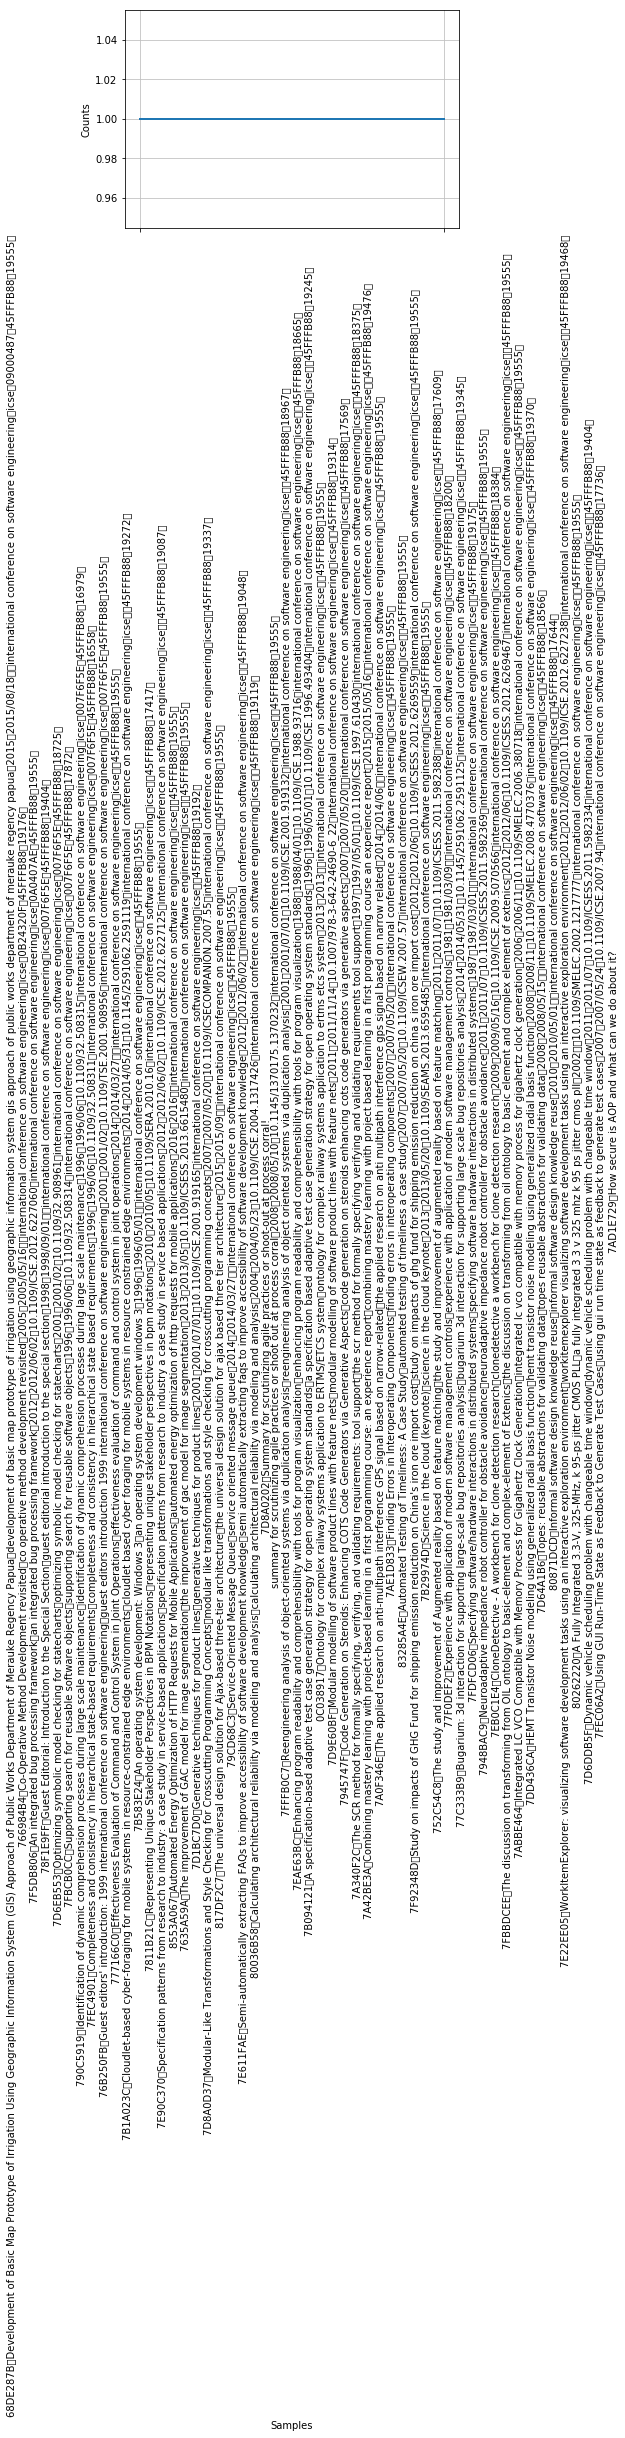

In [38]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(3,cumulative=False)
plt.show()

In [15]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'m', "hasn't", 'am', 'to', 'out', 'more', "needn't", "wouldn't", 'hadn', 's', 'we', 'what', 'again', 'your', 'yours', 've', 'below', 'off', 'll', 'during', 'other', 'such', "aren't", 'been', 'between', "that'll", 'with', "shan't", 'nor', "doesn't", 'how', 'which', 'and', "shouldn't", 'in', 'shouldn', 'were', "won't", 'then', 'myself', 'be', 'will', 'doing', 'a', 'all', 'is', 'that', 'himself', 't', 'o', 'you', 'needn', 'an', 'can', 'under', 'wouldn', "mightn't", 'isn', 'same', 'she', "you'll", 'ours', 'yourself', 'itself', "couldn't", 'over', 'our', 'being', 'has', 'if', 're', 'the', 'me', 'above', 'when', "wasn't", 'after', "should've", 'have', 'ourselves', 'each', 'than', 'haven', 'because', 'herself', 'very', 'having', 'couldn', 'about', "weren't", 'of', 'weren', 'his', 'further', 'before', 'i', 'some', "don't", 'hers', 'does', 'own', 'yourselves', 'hasn', 'until', 'no', 'it', 'their', 'these', 'through', "mustn't", 'while', 'at', 'down', 'won', 'do', 'any', 'just', 'y', 'ain', 'th

In [16]:
filtered_sent=[]
for w in tokenized_text[:2]:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text[:2])
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ["68DE287B\tDevelopment of Basic Map Prototype of Irrigation Using Geographic Information System (GIS) Approach of Public Works Department of Merauke Regency Papua\tdevelopment of basic map prototype of irrigation using geographic information system gis approach of public works department of merauke regency papua\t2015\t2015/08/18\t\tinternational conference on software engineering\ticse\t09000487\t45FFFB88\t19555\r\n766984B4\tCo-Operative Method Development revisited\tco operative method development revisited\t2005\t2005/05/16\t\tinternational conference on software engineering\ticse\t0B24320F\t45FFFB88\t19176\r\n7F5DB806\tAn integrated bug processing framework\tan integrated bug processing framework\t2012\t2012/06/02\t10.1109/ICSE.2012.6227060\tinternational conference on software engineering\ticse\t0A0407AE\t45FFFB88\t19555\r\n78F1E9FF\tGuest Editorial: Introduction to the Special Section\tguest editorial introduction to the special section\t1998\t1998/09/01\t\ti

In [22]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent[:])
print("Stemmed Sentence:",stemmed_words[:])

Filtered Sentence: ["68DE287B\tDevelopment of Basic Map Prototype of Irrigation Using Geographic Information System (GIS) Approach of Public Works Department of Merauke Regency Papua\tdevelopment of basic map prototype of irrigation using geographic information system gis approach of public works department of merauke regency papua\t2015\t2015/08/18\t\tinternational conference on software engineering\ticse\t09000487\t45FFFB88\t19555\r\n766984B4\tCo-Operative Method Development revisited\tco operative method development revisited\t2005\t2005/05/16\t\tinternational conference on software engineering\ticse\t0B24320F\t45FFFB88\t19176\r\n7F5DB806\tAn integrated bug processing framework\tan integrated bug processing framework\t2012\t2012/06/02\t10.1109/ICSE.2012.6227060\tinternational conference on software engineering\ticse\t0A0407AE\t45FFFB88\t19555\r\n78F1E9FF\tGuest Editorial: Introduction to the Special Section\tguest editorial introduction to the special section\t1998\t1998/09/01\t\tin

In [28]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "datas"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: datas
Stemmed Word: data
